<a href="https://colab.research.google.com/github/sayaliph18/NLP-Projects/blob/main/Spam_message_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Data Preprocessing**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('spam.tsv',sep='\t')

In [20]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [21]:
df.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [23]:
df.shape

(5572, 4)

In [24]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [26]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [27]:
df['label'].value_counts()/(len(df))

,count
label,
ham,0.865937
spam,0.134063


In [29]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [30]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [40]:
ham = ham.sample(spam.shape[0])

In [41]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [44]:
#data = ham.append(spam, ignore_index=True)
data = pd.concat([ham,spam], ignore_index=True)

In [46]:
data.head()


,label,message,length,punct
0,ham,"I can't right this second, gotta hit people up...",52,2
1,ham,Purity of friendship between two is not about ...,149,3
2,ham,No message..no responce..what happend?,38,5
3,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,45,7
4,ham,I thk 50 shd be ok he said plus minus 10.. Did...,84,3


In [47]:
data.shape

(1494, 4)

In [48]:
data['label'].value_counts()

,count
label,
ham,747
spam,747


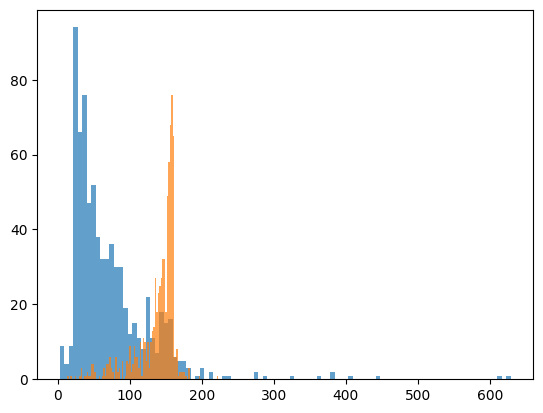

In [51]:
plt.hist(data[data['label'] == 'ham']['length'],bins = 100,alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'],bins = 100,alpha = 0.7)
plt.show()

Higher length message has a very high probability that it belongs to a spam category.

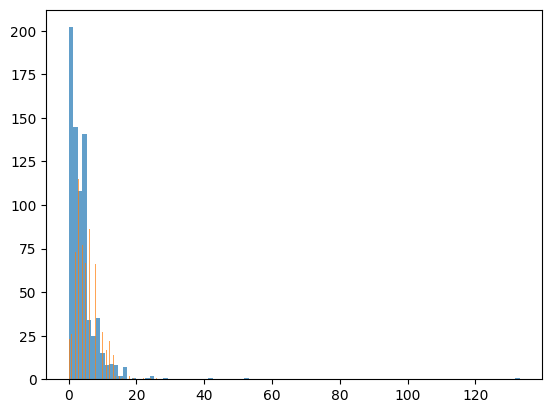

In [52]:
plt.hist(data[data['label'] == 'ham']['punct'],bins = 100,alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'],bins = 100,alpha = 0.7)
plt.show()

Punctuation mark is not much affecting to classification of meassage into ham or spam

In [53]:
#splitting the dataset
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(data['message'],
                                            data['label'],
                                            test_size=0.3,
                                            random_state=0,shuffle=True)

In [56]:
X_train.shape

(1045,)

# **2)Building the model(Random forest)**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [63]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [64]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# **3)Predicting the result**

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam

In [67]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [68]:
accuracy_score(y_test,y_pred)

0.955456570155902

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.95      0.96       449
weighted avg       0.96      0.96      0.96       449



In [70]:
confusion_matrix(y_test,y_pred)

array([[227,   0],
       [ 20, 202]])

# **2)Building the model(SVM)**

In [73]:
from sklearn.svm import SVC

In [75]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100,gamma='auto'))])

In [76]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [77]:
y_pred = svm.predict(X_test)

# **3)Predicting the result**

In [78]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [80]:
confusion_matrix(y_test,y_pred)

array([[225,   2],
       [ 20, 202]])

In [81]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [84]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))


['ham']
['ham']
['spam']


In [85]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))


['ham']
['ham']
['spam']
